<a href="https://colab.research.google.com/github/carlosmding/PDI_SecondProject/blob/main/Tarea2_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea 2: Filtros y descriptores
##Procesamiento digital de imágenes



###Carlos Alfredo Pinto Hernández
###CC 1100953378

In [87]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import sys
from google.colab.patches import cv2_imshow

##Técnicas de filtrado
El proceso de filtrado consiste en la aplicación a cada uno de los pixels de la imagen de una matriz de filtrado de tamaño NxN (generalmente de 3x3 aunque puede ser mayor) compuesta por números enteros y que genera un nuevo valor mediante una función del valor original y los de los pixels circundantes. 

Los filtros más utilizados son los de paso bajo (suavizan la imagen), de paso alto (aumentan el contraste), los filtros direccionales (detectan en la imagen estructuras que siguen una determinada dirección) y los de detección de bordes (permiten identificar y aislar objetos con propiedades homogeneas dentro de la
imagen).




## 1. Filtro de Media

En este filtro se asigna al pixel central la media de todos los pixeles incluidos en la ventana. La matriz de filtrado estaría compuesta por unos y el divisor sería el número total de elementos en la matriz.

También se puede usar el filtro de media ponderada y este los elementos de la matriz de filtrado no son todos 1 sino que se da más peso a uno de ellos (generalmente el central) para obtener un resultado más parecido a la imagen original y evitar que aparezca borrosa.


Usos: Este tipo de filtro es usado para remover ruido, y funciona mejor con imágenes sufriendo del ruido de sal y pimienta.

Ventajas: El filtro de la media es el más simple, intuitivo y fácil de implementar para suavizar imágenes , es decir, reducir la cantidad de variaciones de intensidad entre píxeles vecinos.

Desventajas
•El filtro de la media es bastante sensible a cambios locales.
•El filtro de la media puede crear nuevas intensidades de grises que no aparecían en la imagen.

(([], []), ([], []))

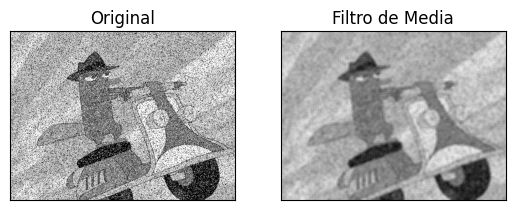

In [88]:
img = cv.imread("/content/salt-perry2.png")
img_median = cv.blur(img, (9,9))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_median),plt.title('Filtro de Media')
plt.xticks([]), plt.yticks([])

## 2. Filtro de Mediana

Para este filtro se selecciona el valor en la posición intermedia luego de ordenar todos los valores de los pixeles (Mediana).

Tiene la ventaja de que el valor final del pixel es un valor real presente en
la imagen y no un promedio, de este modo se reduce el efecto borroso que tienen las imagenes que han sufrido un filtro de media. Además el filtro de la mediana es menos sensible a valores extremos. El incoveniente es que resulta más complejo de calcular ya que hay que ordenar los diferentes valores que aparecen en los pixeles incluidos en la ventana y determinar cual es el valor central.

(([], []), ([], []))

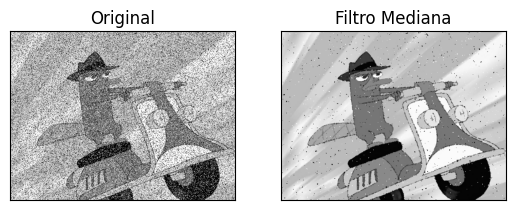

In [89]:
img = cv.imread("/content/salt-perry2.png")
img_mediana = cv.medianBlur(img, 3)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_mediana),plt.title('Filtro Mediana')
plt.xticks([]), plt.yticks([])

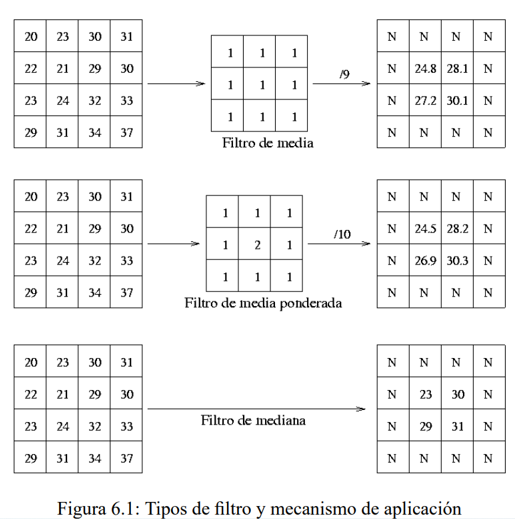

In [90]:
filters = cv.imread("/content/FiltrosBajo.png")
cv2_imshow(filters)

## 3. Filtro Logarítmico

La transformación logarítmica de una imagen es una de las transformaciones de imagen de nivel de gris. La transformación logarítmica de una imagen significa reemplazar todos los valores de píxeles, presentes en la imagen, con sus valores logarítmicos. La transformación de registro se utiliza para mejorar la imagen, ya que expande los píxeles oscuros de la imagen en comparación con los valores de píxeles más altos.

La transformación de registros brinda información real al mejorar la imagen. Si aplicamos este método en una imagen que tiene valores de píxeles más altos, mejorará más la imagen y se perderá la información real de la imagen. Por lo tanto, este método no se puede aplicar en todas partes. Se puede aplicar en imágenes donde los valores de píxeles bajos son más altos que los altos

<ipython-input-91-58c0f08c7c39>:2: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(img_mediana + 1))


(([], []), ([], []))

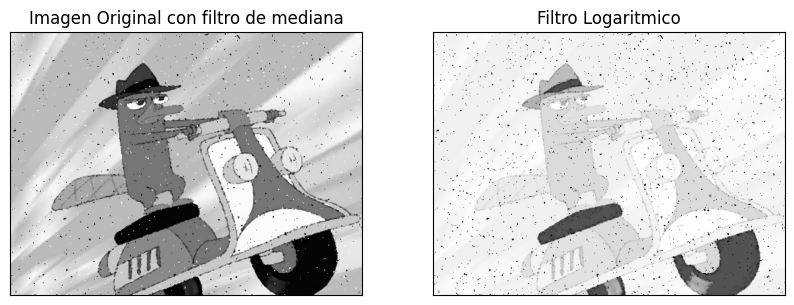

In [91]:
c = 255 / np.log(1 + np.max(img_mediana))
log_image = c * (np.log(img_mediana + 1))
   
log_image = np.array(log_image, dtype = np.uint8)

plt.figure(figsize=(10,6))
plt.subplot(121),plt.imshow(img_mediana),plt.title('Imagen Original con filtro de mediana')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(log_image),plt.title('Filtro Logaritmico')
plt.xticks([]), plt.yticks([])

## 4. Filtro de cuadro normalizado

El filtro homogéneo es simple y cada píxel de salida es la media de sus vecinos del núcleo en un filtro homogéneo. Todos los píxeles contribuyen con el mismo peso, por lo que se denominan filtros homogéneos. En otras palabras, el núcleo es una forma que podemos aplicar o convolucionar sobre una imagen.

En el filtro homogéneo, el kernel K es igual a 1 dividido por el ancho del kernel multiplicado por la altura del kernel. Si queremos usar un kernel de 5 por 5 usando esta fórmula, entonces tendremos K igual a 1 dividido por 25, y tendremos una matriz kernel de 5 por 5 de 1s.



(([], []), ([], []))

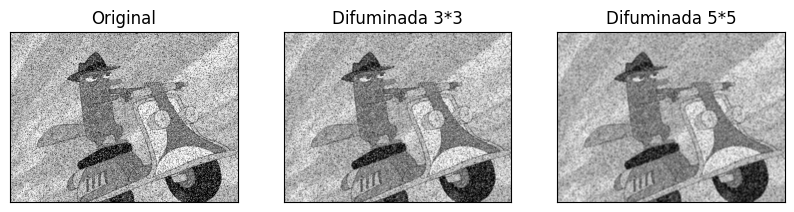

In [92]:
dst = cv.blur(img,(3,3))
dst1 = cv.blur(img,(5,5))

plt.figure(figsize=(10,8))
plt.subplot(131),plt.imshow(img),plt.title('Original') 
plt.xticks([]), plt.yticks([]) 
plt.subplot(132),plt.imshow(dst),plt.title('Difuminada 3*3') 
plt.xticks([]), plt.yticks([]) 
plt.subplot(133),plt.imshow(dst1),plt.title('Difuminada 5*5') 
plt.xticks([]), plt.yticks([]) 

## 5. Filtro Gausiano

Este filtro se usa para emborronar imágenes y eliminar ruido. Es similar al filtro de media pero se usa una máscara diferente, modelizando la función gaussiana. 
Simulan una distribución gaussiana bivariante. El valor máximo aparece en el
pixel central y disminuye hacia los extremos tanto más rápido cuanto menor sea el parámetro de desviación típica s. El resultado será un conjunto de valores entre 0 y 1. Para transformar la matriz a una matriz de números enteros se divide toda la matriz por el menor de los valores obtenidos.

$G(x,y) =  \tfrac{1}{2\Pi \sigma^{2} }e^{-\frac{x^{2}+y^{2}}{2\sigma ^{2}}} $

Ventajas:
Es separable: es decir, en lugar de realizar una convolución bidimensional, podemos realizar dos convoluciones unidimensionales. Una en sentido horizontal y otra en sentido vertical. Además produce un suavizado más uniforme que el filtro de media.




(([], []), ([], []))

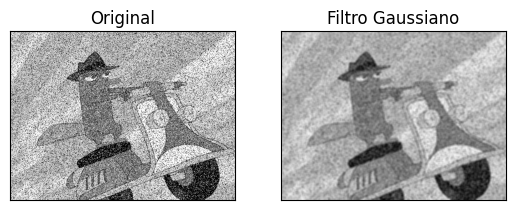

In [93]:
img_gaussian = cv.GaussianBlur(img,(7,7),cv.BORDER_DEFAULT)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_gaussian),plt.title('Filtro Gaussiano')
plt.xticks([]), plt.yticks([])


## 6. Filtro Laplaciano

Filtro laplaciano es una función bidimensional f es un operador de derivación isotrópico (independiente de la dirección de la discontinuidad en la imagen) definido por: $\bigtriangledown ^{2}f = \frac{\partial^2f}{\partial x^2}+\frac{\partial^2 f }{\partial y^2}$.

Como en el caso del gradiente, la formulación del laplaciano puede implementarse en forma digital de varias maneras, como se muestra en la siguiente imagen. La más frecuente en la práctica es aplicar la siguiente máscara: $\bigtriangledown ^{2}f(x,y) = [f(x+1,y)+ f(x-1,y)+f(x,y+1)+f(x,y-1)]-4f(x,y)$

La suma de los coeficientes de la máscara debe ser cero, lo que es coherente en el caso de que el punto en cuestión y sus vecinos tengan el mismo valor.
Los píxeles del borde darán como respuesta un número negativo (o positivo)
“grande”.  

El Laplaciano no se suele usar directamente en la práctica por ser muy sensible
al ruido, por lo que se suele usar sumado o restado (según la máscara usada)
con la imagen original para realzar los contornos.

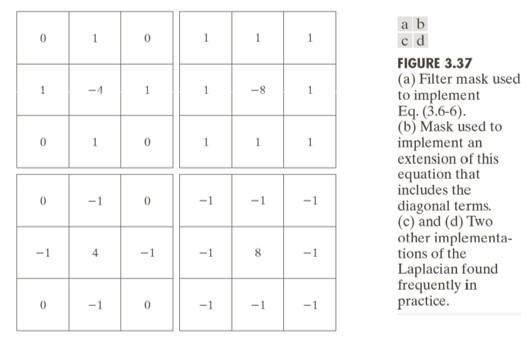

In [94]:
laplacian = cv.imread("/content/laplacian.jpg")
cv2_imshow(laplacian)

(([], []), ([], []))

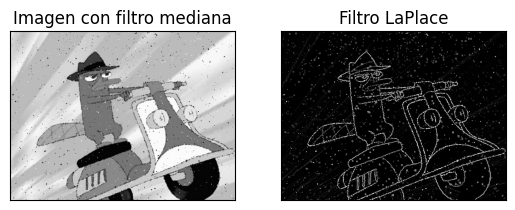

In [95]:
ddepth = cv.CV_16S
kernel_size = 3

img_laplace = cv.Laplacian(img_mediana, ddepth, ksize=kernel_size)

plt.subplot(121),plt.imshow(img_mediana),plt.title('Imagen con filtro mediana')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_laplace),plt.title('Filtro LaPlace')
plt.xticks([]), plt.yticks([])

## 7. Filtro Sobel

Se construyen usando la derivada de la gaussiana, tanto en x como en y. Además, el filtro de Sobel permite calcular derivadas conjuntas en X e Y, derivadas segundas, terceras, etc. En este caso, se suelen usar dos máscaras para modelizar el gradiente (sobel x - sobel y).
Estos operadores tienen más peso los píxeles situados en posición vertical y horizontal respecto el píxel estudiado que los situados en la diagonal. Este operador es menos sensible al ruido.

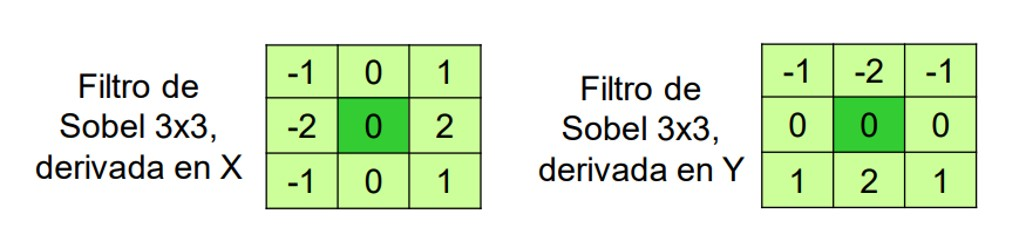

In [96]:
sobel = cv.imread("/content/sobel.jpg")
cv2_imshow(sobel)

(([], []), ([], []))

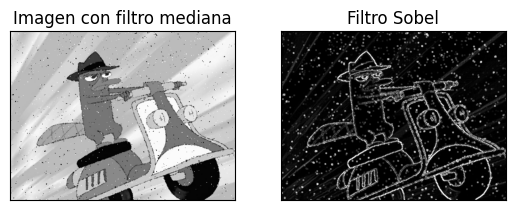

In [97]:
scale = 1
delta = 0
ddepth = cv.CV_16S

img_gaussian = cv.GaussianBlur(img_mediana, (3, 3), 0)
      
grad_x = cv.Sobel(img_gaussian, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
grad_y = cv.Sobel(img_gaussian, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)

abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)

grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

plt.subplot(121),plt.imshow(img_mediana),plt.title('Imagen con filtro mediana')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(grad),plt.title('Filtro Sobel')
plt.xticks([]), plt.yticks([])


## 8. Filtro Canny

El filtro Canny o algoritmo combina un operador diferencial con un filtro gaussiano. El detector de contornos de Canny sigue los siguientes pasos:
1. Reducción de ruido. Se suaviza la imagen con un filtro gaussiano reduciendo el ruido, los detalles y las texturas que no interesan.
2. Cálculo del gradiente. Para la obtención del gradiente se aplica el filtro Sobel a la imagen suavizada.
3. Supresión de “no máximos”. Una vez calculado la dirección del gradiente en el paso anterior, se debe encontrar la dirección que mejor se aproxima a la normal al borde. En este caso se eliminan los puntos que no tienen un valor máximo de gradiente según la dirección perpendicular al contorno.
4. Histéresis. En este paso se definen los bordes definitivos, seleccionando sólo aquellos píxeles cuyo gradiente se encuentra entre dos umbrales establecidos.

Al disminuir la desviación típica de la función gaussiana de suavizado se reduce el efecto de suavizado, por lo que en la imagen de bordes se incrementará el número de aristas. Por el contrario, al aumentar dicho parámetro se obtendrán aquellos contornos que correspondan con límites más contrastados, si bien ello conlleva un aumento del error en su posición

(([], []), ([], []))

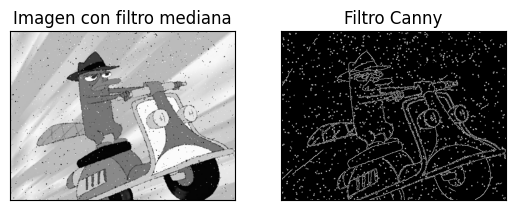

In [98]:
edges = cv.Canny(img_mediana,100,200)

plt.subplot(121),plt.imshow(img_mediana),plt.title('Imagen con filtro mediana')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges, cmap = 'gray'),plt.title('Filtro Canny')
plt.xticks([]), plt.yticks([])


## Comparación Filtros detección de bordes

(([], []), ([], []))

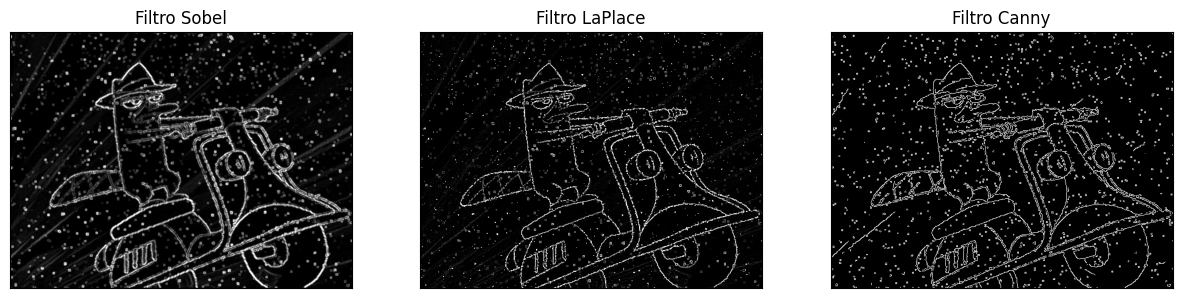

In [99]:
plt.figure(figsize=(15,8))
plt.subplot(131),plt.imshow(grad),plt.title('Filtro Sobel')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_laplace),plt.title('Filtro LaPlace')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(edges, cmap = 'gray'),plt.title('Filtro Canny')
plt.xticks([]), plt.yticks([])